In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql.functions import desc
from pyspark.sql.functions import *
import pyspark.sql.functions as fun
import numpy as np
import pandas as pd

In [2]:
SparkSession \
 .builder \
 .master("local[*]")\
 .appName("Pyspark SQL") \
 .config("spark.memory.fraction", 0.8) \
 .config("spark.executor.memory", "16g") \
 .config("spark.driver.memory", "45g")\
 .config("spark.sql.shuffle.partitions" , "800") \
 .config("spark.memory.offHeap.enabled",'true')\
 .config("spark.memory.offHeap.size","16g")\
 .getOrCreate()

In [3]:
mySpark = SparkSession.builder.getOrCreate()
spark = SparkSession(mySpark)

In [4]:
#Loading the dataset
sales=spark.read.csv("final-data.csv",header=True)

In [5]:
sales

DataFrame[Store: string, Dept: string, Date: string, Weekly_Sales: string, IsHoliday: string, Temperature: string, Fuel_Price: string, MarkDown1: string, MarkDown2: string, MarkDown3: string, MarkDown4: string, MarkDown5: string, CPI: string, Unemployment: string, Type: string, Size: string]

In [6]:
sales.count()

421570

In [7]:
sales.printSchema()

root
 |-- Store: string (nullable = true)
 |-- Dept: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weekly_Sales: string (nullable = true)
 |-- IsHoliday: string (nullable = true)
 |-- Temperature: string (nullable = true)
 |-- Fuel_Price: string (nullable = true)
 |-- MarkDown1: string (nullable = true)
 |-- MarkDown2: string (nullable = true)
 |-- MarkDown3: string (nullable = true)
 |-- MarkDown4: string (nullable = true)
 |-- MarkDown5: string (nullable = true)
 |-- CPI: string (nullable = true)
 |-- Unemployment: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Size: string (nullable = true)



### Selecting specifice column

In [8]:
sales.select('Weekly_sales').show(10)

+------------+
|Weekly_sales|
+------------+
|     24924.5|
|    46039.49|
|    41595.55|
|    19403.54|
|     21827.9|
|    21043.39|
|    22136.64|
|    26229.21|
|    57258.43|
|    42960.91|
+------------+
only showing top 10 rows



### Removing duplicate data

In [9]:
sales = sales.dropDuplicates()

In [10]:
sales.count()

421570

In [11]:
### percent of missing value in column
total = sales.count()
for col in sales.columns:
    sales_filter = (sales.filter(sales[col]=="0")).count()
    percen_filter = sales_filter/total
    print(col, "\t", "with ‘0’ values: ", percen_filter)

Store 	 with ‘0’ values:  0.0
Dept 	 with ‘0’ values:  0.0
Date 	 with ‘0’ values:  0.0
Weekly_Sales 	 with ‘0’ values:  0.0
IsHoliday 	 with ‘0’ values:  0.0
Temperature 	 with ‘0’ values:  0.0
Fuel_Price 	 with ‘0’ values:  0.0
MarkDown1 	 with ‘0’ values:  0.0
MarkDown2 	 with ‘0’ values:  0.0
MarkDown3 	 with ‘0’ values:  0.0
MarkDown4 	 with ‘0’ values:  0.0
MarkDown5 	 with ‘0’ values:  0.0
CPI 	 with ‘0’ values:  0.0
Unemployment 	 with ‘0’ values:  0.0
Type 	 with ‘0’ values:  0.5111321963137795
Size 	 with ‘0’ values:  0.0


In [12]:
sales.describe('Temperature').show()

+-------+--------------------+
|summary|         Temperature|
+-------+--------------------+
|  count|              421570|
|   mean|  15.605588184906699|
| stddev|  10.248850637564404|
|    min|-0.02222222222222...|
|    max|   9.994444444444447|
+-------+--------------------+



In [13]:
sales.groupBy(sales.Temperature).count().sort(desc("count")).show(20)

+------------------+-----+
|       Temperature|count|
+------------------+-----+
|10.238888888888889|  709|
| 19.92777777777778|  646|
| 22.56666666666667|  594|
| 24.81666666666667|  583|
|21.266666666666666|  563|
|24.461111111111112|  555|
|10.311111111111112|  544|
|17.805555555555557|  542|
| 17.89444444444444|  519|
|10.450000000000001|  487|
| 17.01111111111111|  484|
| 6.900000000000001|  458|
|11.261111111111113|  457|
|21.216666666666665|  449|
|25.816666666666666|  442|
|  9.97777777777778|  441|
|4.8055555555555545|  434|
|14.983333333333333|  425|
| 21.59444444444445|  422|
|20.727777777777778|  406|
+------------------+-----+
only showing top 20 rows



In [14]:
sales.groupBy(sales.Weekly_Sales).count().sort(desc("count")).show(20)

+------------+-----+
|Weekly_Sales|count|
+------------+-----+
|        10.0|  353|
|         5.0|  289|
|        20.0|  232|
|        15.0|  215|
|        12.0|  175|
|         1.0|  169|
|       10.47|  167|
|       11.97|  154|
|         2.0|  148|
|         7.0|  146|
|         3.0|  141|
|        30.0|  140|
|        25.0|  135|
|        5.88|  134|
|        40.0|  127|
|         8.0|  119|
|        88.0|  118|
|        45.0|  110|
|         4.0|  109|
|       11.47|  107|
+------------+-----+
only showing top 20 rows



In [15]:
sales.groupBy(sales.Type).count().sort(desc("count")).show()

+----+------+
|Type| count|
+----+------+
|   0|215478|
|   1|163495|
|   2| 42597|
+----+------+



In [16]:
sales.groupBy(sales.Date).count().sort(desc("count")).show()

+----------+-----+
|      Date|count|
+----------+-----+
|2011-12-23| 3027|
|2011-11-25| 3021|
|2011-12-16| 3013|
|2011-09-12| 3010|
|2012-02-17| 3007|
|2011-12-30| 3003|
|2012-10-02| 3001|
|2011-02-12| 2994|
|2012-02-03| 2990|
|2012-12-10| 2990|
|2012-06-04| 2983|
|2012-04-13| 2977|
|2010-02-19| 2977|
|2012-03-02| 2977|
|2012-05-10| 2976|
|2012-04-20| 2975|
|2011-06-05| 2974|
|2012-09-03| 2974|
|2012-06-01| 2973|
|2012-11-05| 2973|
+----------+-----+
only showing top 20 rows



In [17]:
sales.groupBy(sales.Temperature).count().sort(desc("count")).show()

+------------------+-----+
|       Temperature|count|
+------------------+-----+
|10.238888888888889|  709|
| 19.92777777777778|  646|
| 22.56666666666667|  594|
| 24.81666666666667|  583|
|21.266666666666666|  563|
|24.461111111111112|  555|
|10.311111111111112|  544|
|17.805555555555557|  542|
| 17.89444444444444|  519|
|10.450000000000001|  487|
| 17.01111111111111|  484|
| 6.900000000000001|  458|
|11.261111111111113|  457|
|21.216666666666665|  449|
|25.816666666666666|  442|
|  9.97777777777778|  441|
|4.8055555555555545|  434|
|14.983333333333333|  425|
| 21.59444444444445|  422|
|20.727777777777778|  406|
+------------------+-----+
only showing top 20 rows



In [18]:
sales.select("Temperature").distinct().count()

3528

In [19]:
sales.groupBy(sales.Temperature).count().sort(desc("count")).show(20)

+------------------+-----+
|       Temperature|count|
+------------------+-----+
|10.238888888888889|  709|
| 19.92777777777778|  646|
| 22.56666666666667|  594|
| 24.81666666666667|  583|
|21.266666666666666|  563|
|24.461111111111112|  555|
|10.311111111111112|  544|
|17.805555555555557|  542|
| 17.89444444444444|  519|
|10.450000000000001|  487|
| 17.01111111111111|  484|
| 6.900000000000001|  458|
|11.261111111111113|  457|
|21.216666666666665|  449|
|25.816666666666666|  442|
|  9.97777777777778|  441|
|4.8055555555555545|  434|
|14.983333333333333|  425|
| 21.59444444444445|  422|
|20.727777777777778|  406|
+------------------+-----+
only showing top 20 rows



# Exploratory Data analysis

In [20]:
df_2=sales.toPandas()

In [21]:
df_2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2,2012-10-08,46729.91,False,29.47222222222222,3.4939999999999998,11436.22,245.0,6.85,6964.26,4836.22,221.9584329,6.9079999999999995,0,151315
1,1,7,2012-08-24,15159.94,False,25.366666666666664,3.62,6237.83,260.06,2.97,3463.03,7988.25,222.17194569999998,6.9079999999999995,0,151315
2,1,14,2010-05-14,14678.22,False,23.766666666666666,2.8539999999999996,0.0,0.0,0.0,0.0,0.0,210.3374261,7.808,0,151315
3,1,16,2010-07-30,22017.61,False,27.68888888888889,2.64,0.0,0.0,0.0,0.0,0.0,211.36990319999995,7.787000000000001,0,151315
4,1,23,2011-09-16,13053.74,False,26.633333333333333,3.5260000000000002,0.0,0.0,0.0,0.0,0.0,216.0410526,7.962000000000001,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58,2011-06-05,2155.0,False,14.561111111111112,4.046,0.0,0.0,0.0,0.0,0.0,185.9374378,8.521,1,118221
421566,45,79,2010-01-10,15016.24,False,21.43333333333333,2.707,0.0,0.0,0.0,0.0,0.0,182.7168385,8.724,1,118221
421567,45,80,2011-05-13,907.11,False,15.766666666666667,4.066,0.0,0.0,0.0,0.0,0.0,186.0719231,8.521,1,118221
421568,45,81,2010-09-17,14473.55,False,19.194444444444443,2.7060000000000004,0.0,0.0,0.0,0.0,0.0,182.622509,8.743,1,118221


In [24]:
df_2 = df_2.sort_values(by = ['Date'])

In [26]:
# splitting date into 3 columns denoting Year, Month and Day respectively
df_2['Year'] = df_2.Date.apply(lambda x: int(str(x)[:4]))
df_2['Month'] = df_2.Date.apply(lambda x: int(str(x)[5:7]))
df_2['Year-Month'] = df_2.Date.apply(lambda x: str(x)[:7])
df_2['Day'] = df_2.Date.apply(lambda x: int(str(x)[8:10]))

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

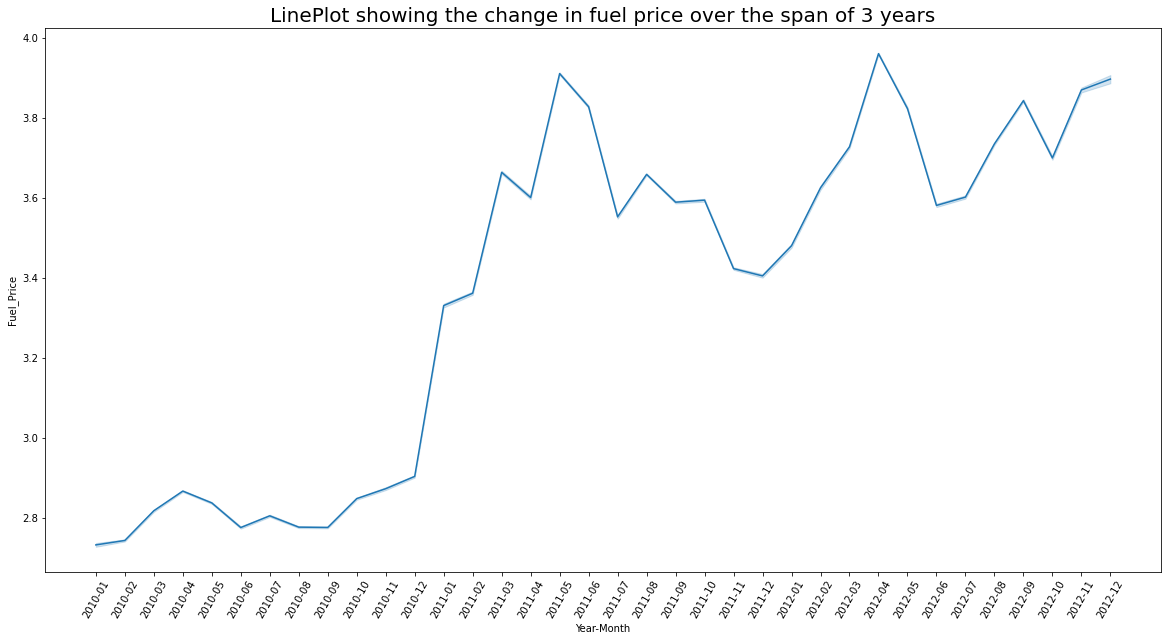

In [36]:
#df.groupby(['Year','Month']).Fuel_Price.mean()
plot_no = 1
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_2, x = 'Year-Month',y = 'Fuel_Price')
_ = plt.title('LinePlot showing the change in fuel price over the span of 3 years', fontsize=20)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [41]:
r = 5 #lets round off the temperature in the range of r
df_2['Temperature_r'] = df_2.sort_values(by=['Temperature']).Temperature.apply(lambda x : x - x %r)

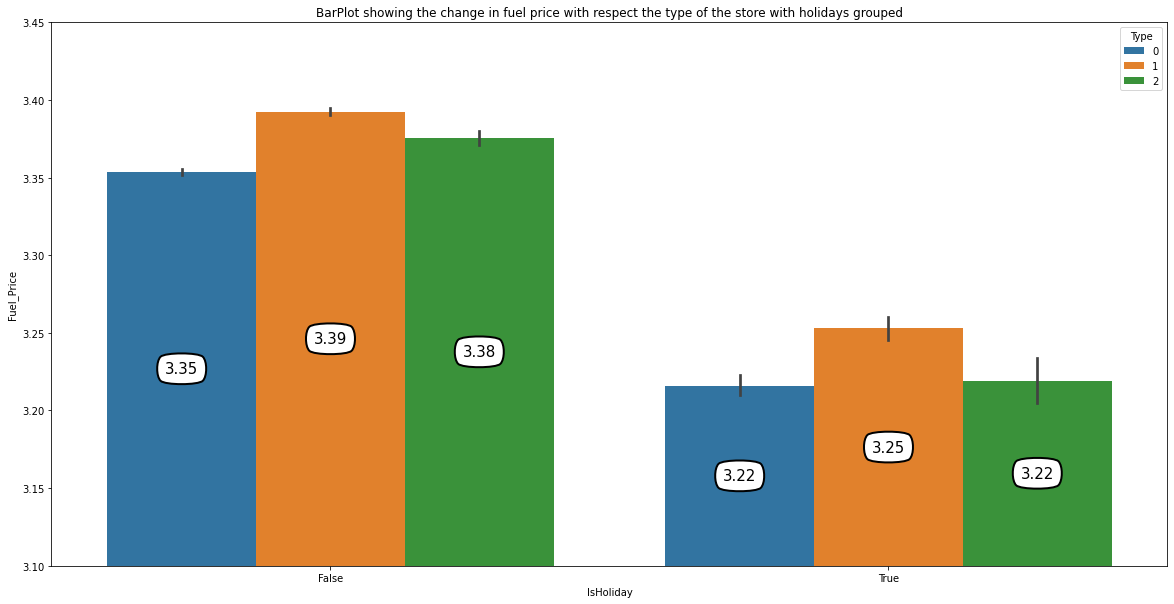

In [42]:
_ = plt.subplots(figsize = (20,10))
_ = plt.ylim(3.1,3.45)
plots = sns.barplot(data = df_2, x = 'IsHoliday', y = 'Fuel_Price', hue = 'Type')
_ = plt.title('BarPlot showing the change in fuel price with respect the type of the store with holidays grouped')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

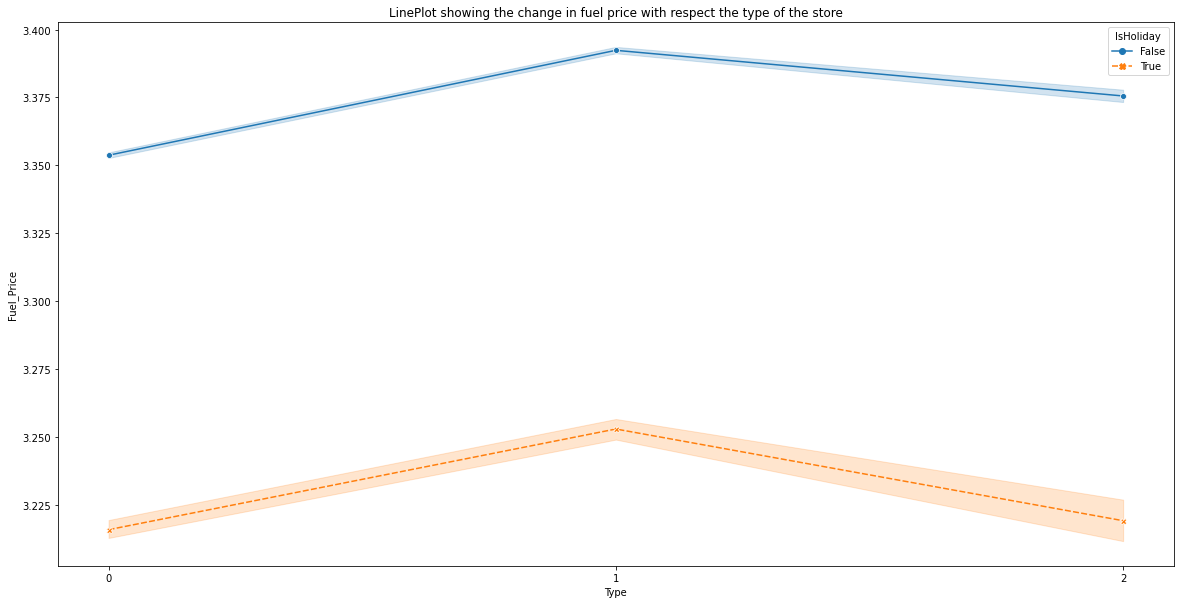

In [44]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df_2, x = 'Type', y = 'Fuel_Price', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)
_ = plt.title('LinePlot showing the change in fuel price with respect the type of the store')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

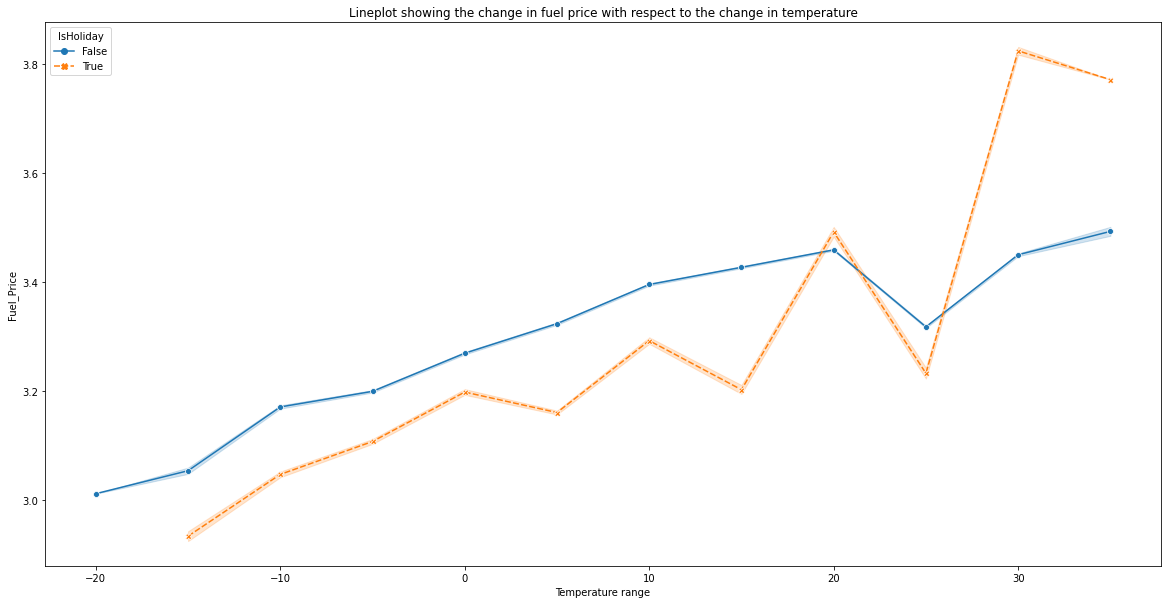

In [46]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df_2, x = 'Temperature_r', y = 'Fuel_Price', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)
_ = plt.xlabel('Temperature range')
_ = plt.title('Lineplot showing the change in fuel price with respect to the change in temperature')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

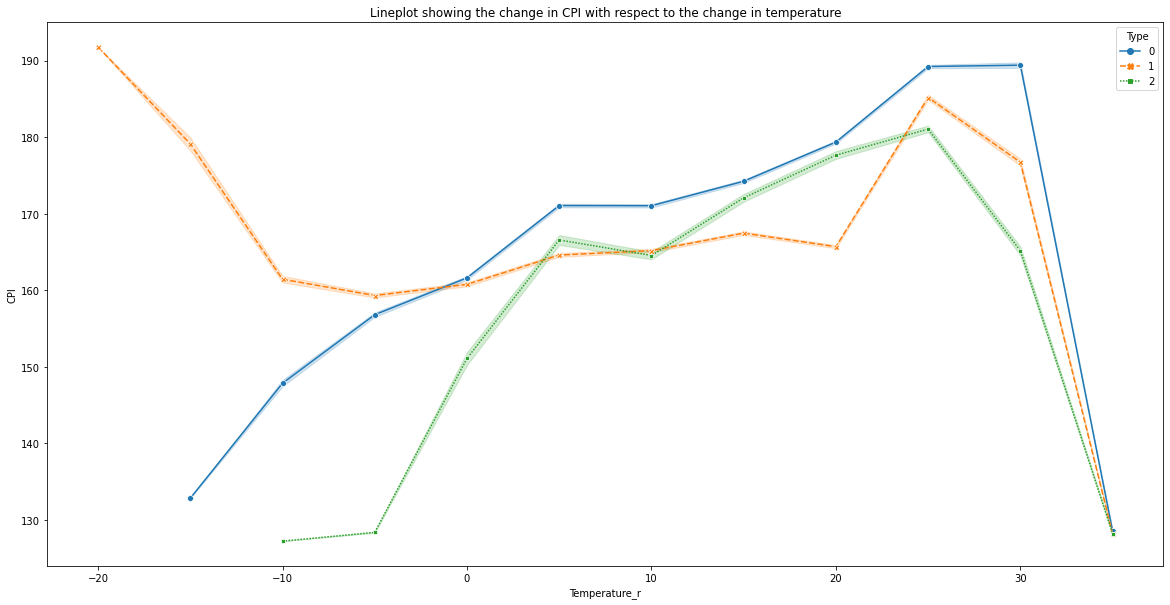

In [47]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df_2, x = 'Temperature_r', y = 'CPI', hue = 'Type',style = 'Type', markers = True, ci = 68)
_ = plt.title('Lineplot showing the change in CPI with respect to the change in temperature')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

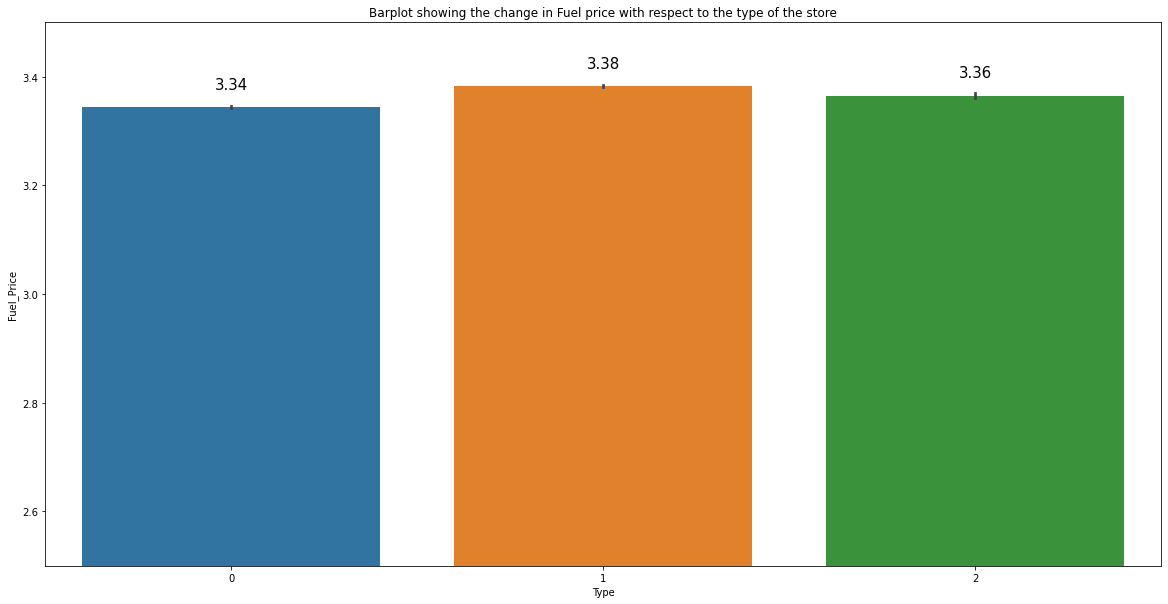

In [50]:
_ = plt.subplots(figsize = (20,10))
plots = sns.barplot(data = df_2, x = 'Type', y = 'Fuel_Price')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 23),
                   textcoords='offset points');
_ = plt.ylim(2.5,3.5)
_ = plt.title('Barplot showing the change in Fuel price with respect to the type of the store')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

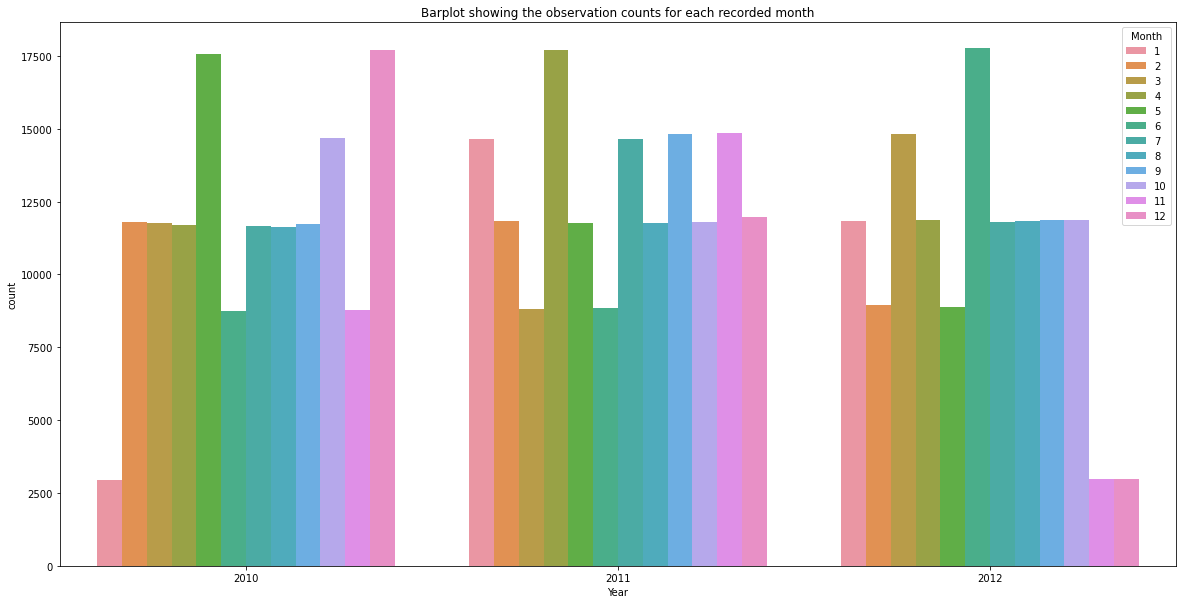

In [49]:
_ = plt.subplots(figsize = (20,10))
_ = sns.countplot(data = df_2,x='Year',hue='Month')
_ = plt.title('Barplot showing the observation counts for each recorded month')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [81]:
df_3=df_2

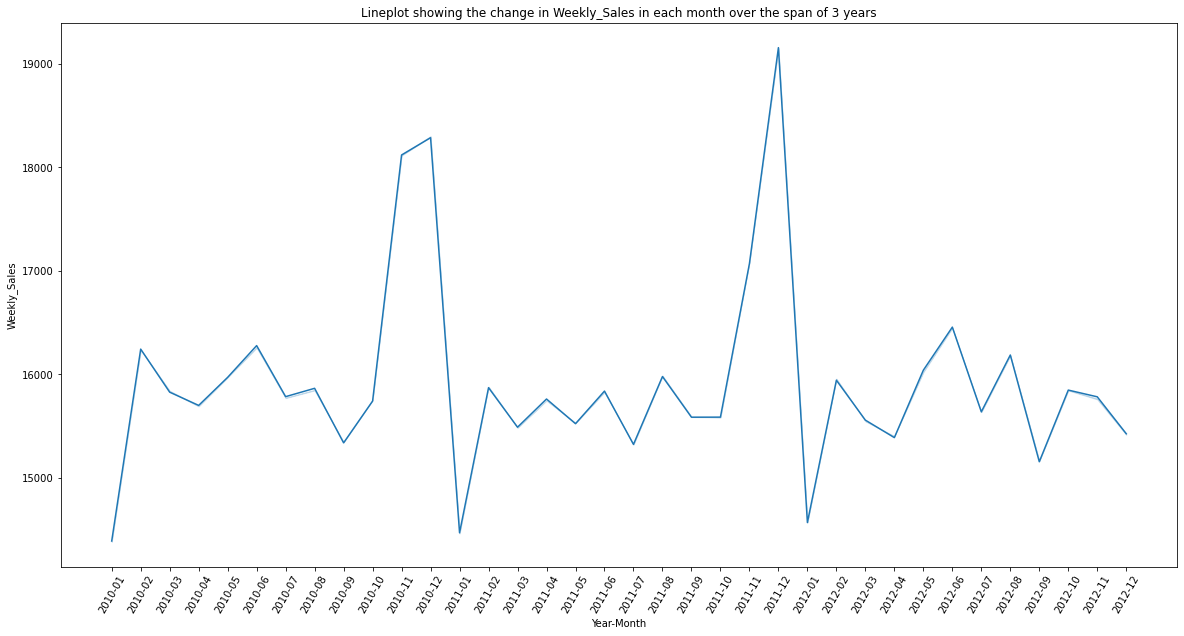

In [52]:
fig,ax = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df_2, x = 'Year-Month', y = 'Weekly_Sales', ax = ax, ci = 1)
_ = plt.xticks(rotation = 60)
_ = plt.title('Lineplot showing the change in Weekly_Sales in each month over the span of 3 years')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

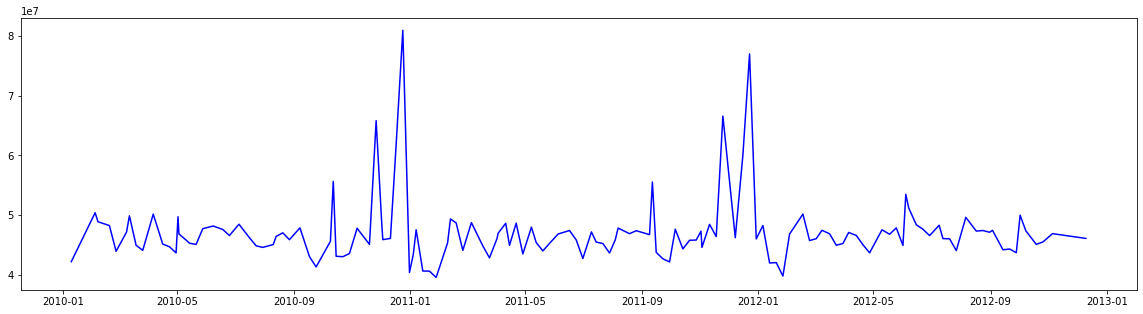

In [64]:
df_average_sales_weekly = df_2.groupby('Date', as_index=False)\
    .agg({'Weekly_Sales': 'sum'})

df_average_sales_sorted = df_average_sales_weekly.sort_values('Weekly_Sales', ascending = False)

plt.figure(figsize=(20,5))

plt.plot(df_average_sales_weekly.Date, df_average_sales_weekly.Weekly_Sales, color = 'b')

plt.show()

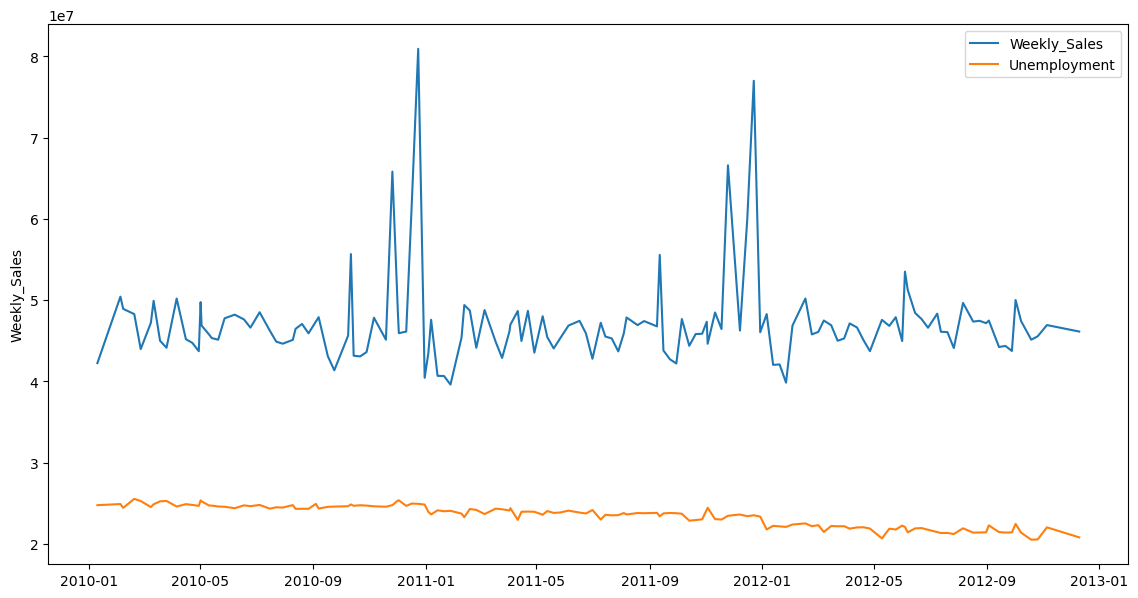

In [88]:

df2=df_2.groupby(by=['Date'], as_index=False)[['Weekly_Sales','Unemployment']].sum()
df2['Unemployment']=df2['Unemployment']*1000
f_1 = plt.figure(figsize=(12,6), dpi=100)
ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_ylabel('Weekly_Sales')
ax_1.plot(df2['Date'], df2['Weekly_Sales'])
ax_1.plot(df2['Date'], df2['Unemployment'])
ax_1.legend(labels=['Weekly_Sales','Unemployment'])

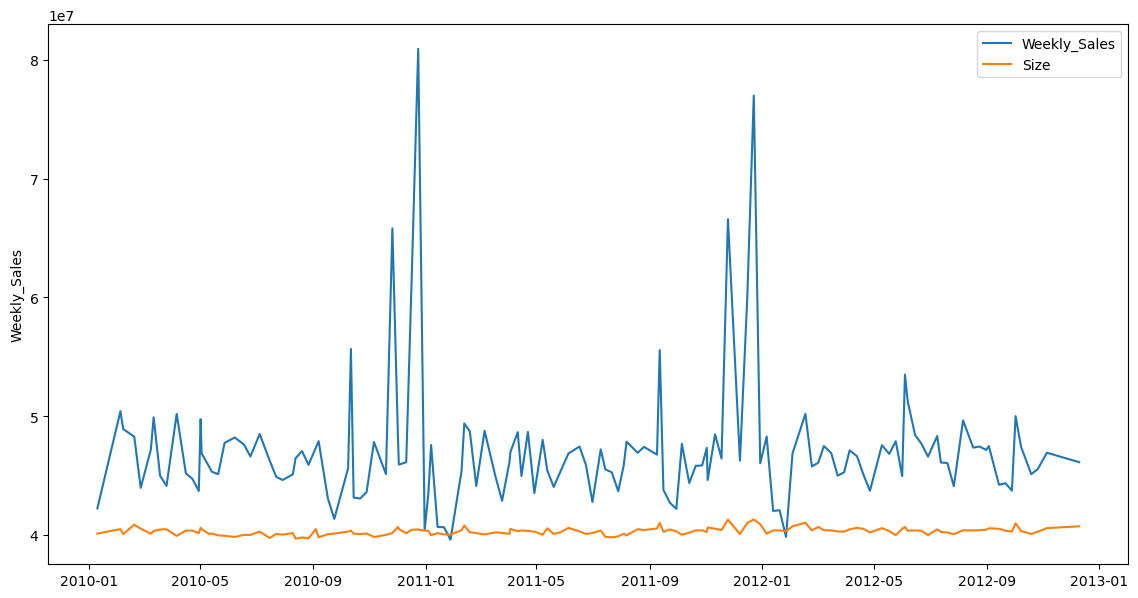

In [89]:
df2=df_2.groupby(by=['Date'], as_index=False)[['Weekly_Sales','Size']].sum()
df2['Size']=df2['Size']*0.1
f_1 = plt.figure(figsize=(12,6), dpi=100)
ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_ylabel('Weekly_Sales')
ax_1.plot(df2['Date'], df2['Weekly_Sales'])
ax_1.plot(df2['Date'], df2['Size'])
ax_1.legend(labels=['Weekly_Sales','Size'])

<AxesSubplot:xlabel='Date'>

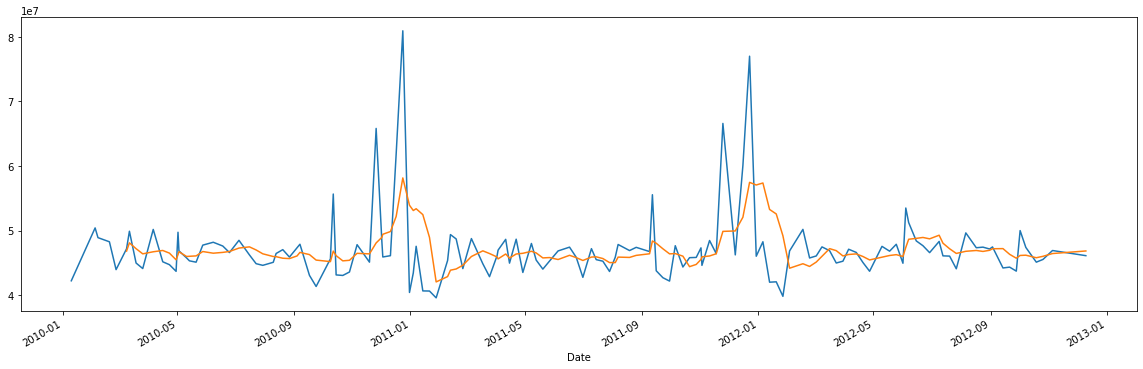

In [91]:
df2=df_2.groupby(by=['Date'], as_index=False)[['Weekly_Sales','Size']].sum()
df1=df2.set_index("Date")
df1['Weekly_Sales'].plot(figsize=(20,6))
df1.rolling(window=6).mean()['Weekly_Sales'].plot()

#### Performance Based on Stores

<BarContainer object of 3 artists>

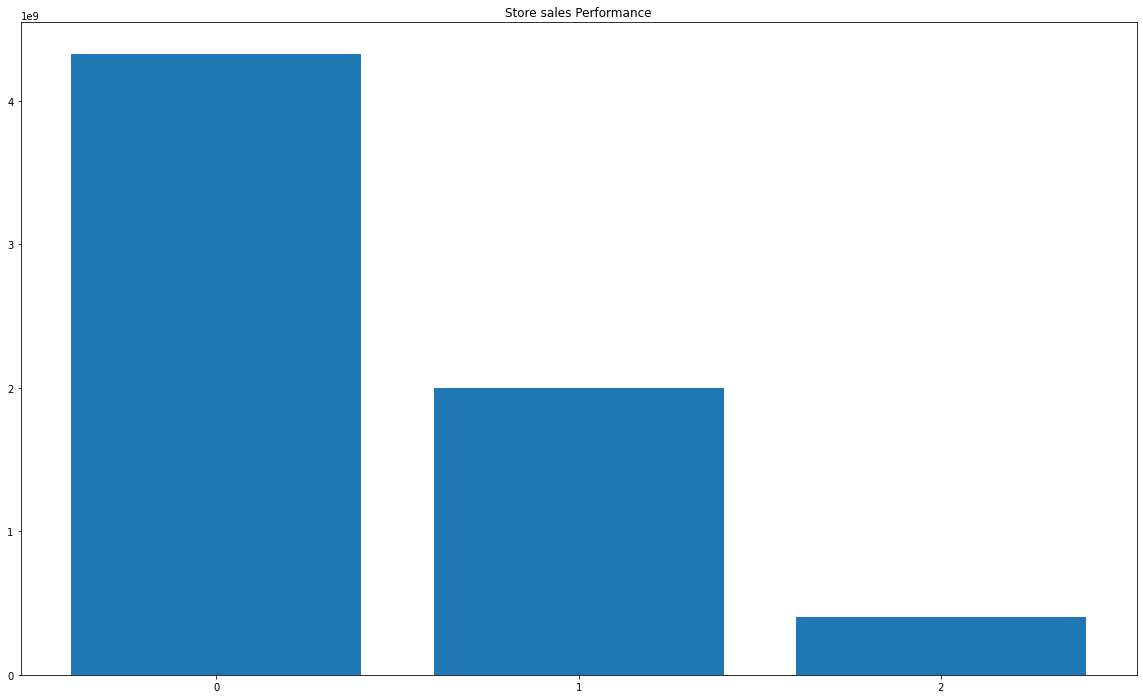

In [72]:
df_3 = df_2.groupby('Type').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
plt.title('Store sales Performance')
ax.bar('Type', 'Weekly_Sales', data=df_3)

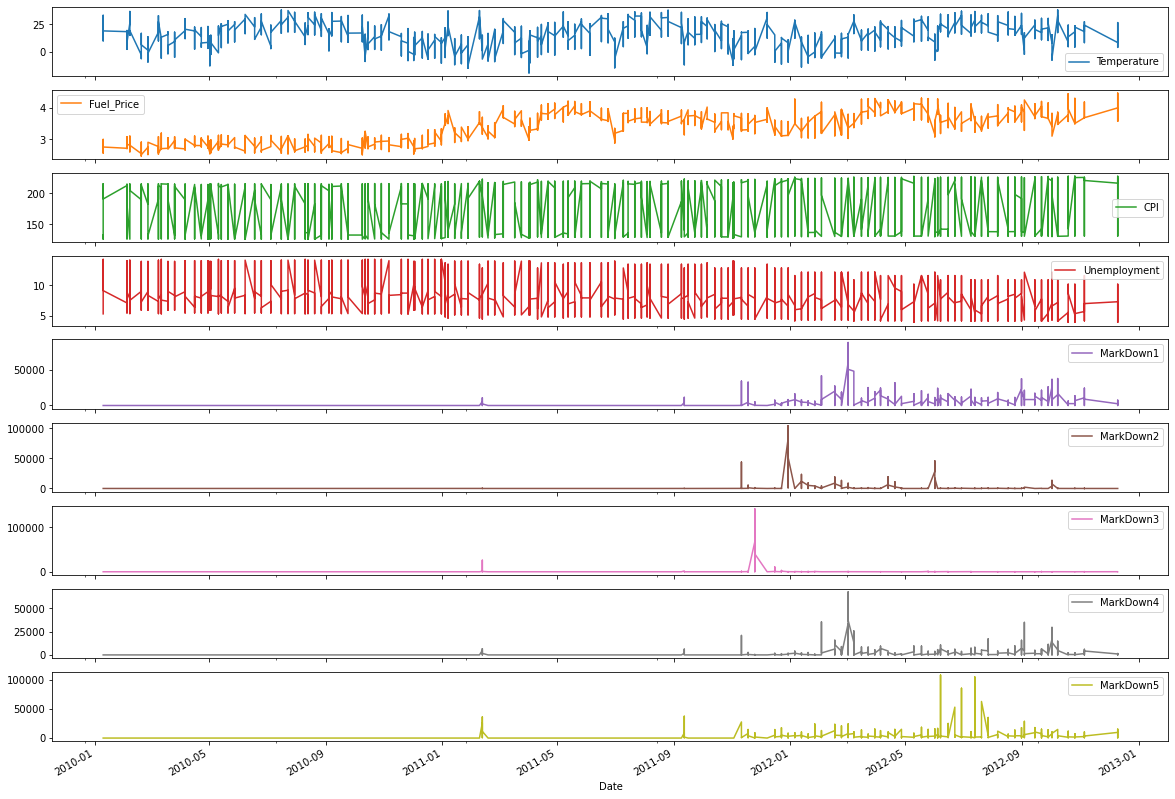

In [68]:
_ = df_2[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x = 'Date', subplots = True, figsize = (20,15))
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [55]:
df_2['Date'] = pd.to_datetime(df_2['Date'])

<AxesSubplot:>

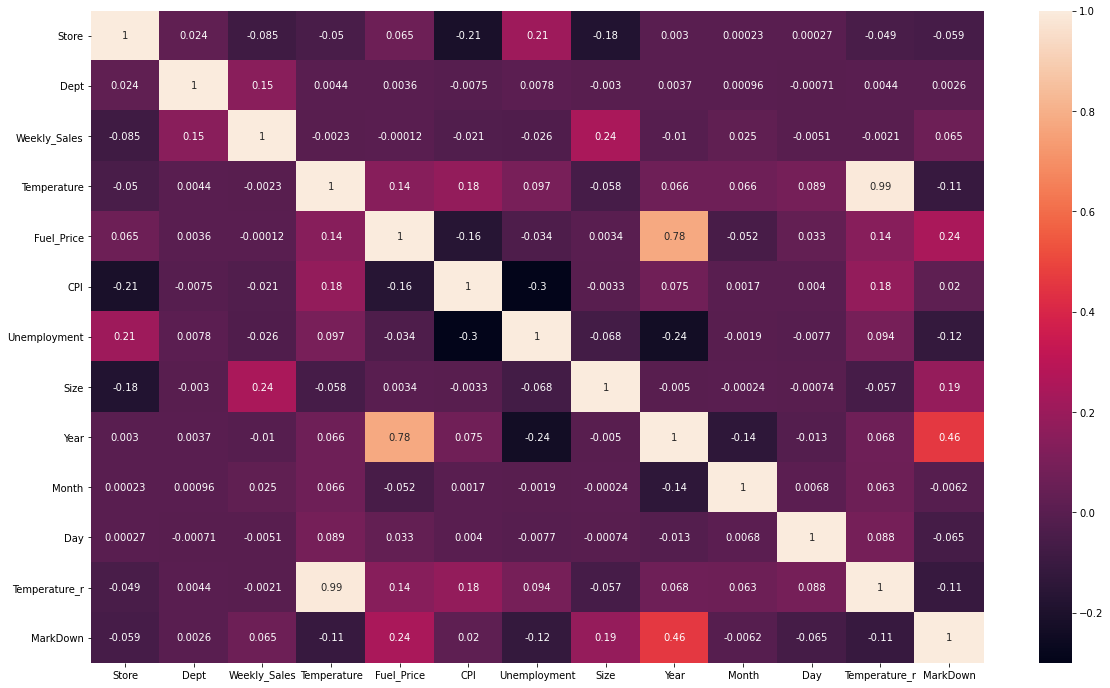

In [57]:
df_3= df_2.copy(deep=True)
df_3['MarkDown'] = df_3['MarkDown1'] + df_3['MarkDown2'] +df_3['MarkDown3'] +df_3['MarkDown4'] + df_3['MarkDown5']
df_3.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True, axis = 1)
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_3.corr(),annot=True)

In [102]:
sales2=sales
sales2

DataFrame[Store: string, Dept: string, Date: string, Weekly_Sales: string, IsHoliday: string, Temperature: string, Fuel_Price: string, MarkDown1: string, MarkDown2: string, MarkDown3: string, MarkDown4: string, MarkDown5: string, CPI: string, Unemployment: string, Type: string, Size: string]

In [21]:
sales3=sales2.drop('Weekly_Sales', 'Year', 'DayOfYear')

In [106]:
from pyspark.sql.types import IntegerType
sales2 = sales2.withColumn("Weekly_Sales", sales2["Weekly_Sales"].cast(IntegerType()))
sales2.printSchema()

root
 |-- Store: string (nullable = true)
 |-- Dept: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weekly_Sales: integer (nullable = true)
 |-- IsHoliday: string (nullable = true)
 |-- Temperature: string (nullable = true)
 |-- Fuel_Price: string (nullable = true)
 |-- MarkDown1: string (nullable = true)
 |-- MarkDown2: string (nullable = true)
 |-- MarkDown3: string (nullable = true)
 |-- MarkDown4: string (nullable = true)
 |-- MarkDown5: string (nullable = true)
 |-- CPI: string (nullable = true)
 |-- Unemployment: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Size: string (nullable = true)



In [108]:
cols = ['Store', 'Dept', 'Date', 'IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Weekly_Sales']

## Machine Learning

In [103]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorIndexer
from pyspark.sql.functions import col, explode, array, lit
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

In [ ]:
#steps

In [109]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categoricalColumns =['Store', 'Dept', 'Date', 'IsHoliday','Temperature','Fuel_Price',
                          'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'Weekly_Sales', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['Weekly_Sales']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [110]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(sales2)
df = pipelineModel.transform(sales2)
selectedCols = ['label', 'features'] + categoricalColumns
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Store: string (nullable = true)
 |-- Dept: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- IsHoliday: string (nullable = true)
 |-- Temperature: string (nullable = true)
 |-- Fuel_Price: string (nullable = true)
 |-- MarkDown1: string (nullable = true)
 |-- MarkDown2: string (nullable = true)
 |-- MarkDown3: string (nullable = true)
 |-- MarkDown4: string (nullable = true)
 |-- MarkDown5: string (nullable = true)
 |-- CPI: string (nullable = true)
 |-- Unemployment: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Weekly_Sales: integer (nullable = true)



In [111]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,32486,12494,15431,27994,22621
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Store,1,1,1,1,1
Dept,2,7,14,16,23
Date,2012-10-08,2012-08-24,2010-05-14,2010-07-30,2011-09-16
IsHoliday,False,False,False,False,False
Temperature,29.47222222222222,25.366666666666664,23.766666666666666,27.68888888888889,26.633333333333333
Fuel_Price,3.4939999999999998,3.62,2.8539999999999996,2.64,3.5260000000000002
MarkDown1,11436.22,6237.83,0.0,0.0,0.0
MarkDown2,245.0,260.06,0.0,0.0,0.0


In [112]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 294744
Test Dataset Count: 126826


In [113]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [598.6432968069794,1400.7738832668724,623.6772478929773,266.2023931626778,830.2812409832841,232.2005097558209,354.562959272397,-85.42176953184871,734.3338984101713,591.4108133966623,363.8572585444751,631.0929509019446,424.8633142631677,819.9562559277134,278.9400754977501,913.2244210148124,952.9210989122283,643.1717060383439,-380.49026000449027,-692.7608527111581,0.0,882.8939832771872,23.014134079052244,364.7644628587687,-116.91046707884082,-453.0608921067043,-606.8302903444923,717.1567821002307,225.9223259493032,-364.9400180732242,-8.207735720283917,-5.19284999165327,-471.885531647621,-469.5352773232441,-1382.4308516043482,-718.2026288365774,-334.9139161192637,-2526.8476227991996,99.46775959389149,-1639.0142247365989,-1831.6108131630228,-1698.4378432476146,-746.5567896758848,-1318.6588366360916,3387.8584156531733,3441.0259433215324,8477.87397871991,1697.3192285981072,852.8426093917192,10417.914472651037,-3343.7699125570853,-185.86430626796863,12622.32912414109,6991.398019

In [41]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 7146.021186
r2: 0.796320


In [43]:
lr_predictions = lr_model.transform(test)
lr_predictions.select("prediction","label","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="label",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-------------------+-----+--------------------+
|         prediction|label|            features|
+-------------------+-----+--------------------+
|-386.02865829045004|  0.0|(16892,[22,114,16...|
|-1102.4992084995183|  8.0|(16892,[31,120,14...|
| -70.56329293781073| 22.0|(16892,[37,83,148...|
|  4553.338991818029| 23.0|(16892,[27,107,17...|
|  4583.772132165712| 34.0|(16892,[43,74,153...|
+-------------------+-----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.790408


In [44]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.4999983036126264, 0.43702661049095537, 0.22205419831229098, 0.11266617125670793, 0.10957533952757616, 0.10733304492635812, 0.10635704790252187, 0.10512909203013643, 0.10311596118634248, 0.10254834438950094, 0.10197540553047921]
+-------------------+
|          residuals|
+-------------------+
|  2595.107333116832|
|  -716.991701680885|
| -773.0828611234429|
|-2681.3345880955003|
|-11631.885403901842|
|-4607.5814695560875|
| -4556.691751535298|
|-1472.1865320551951|
| -8598.900282311015|
|-392.11742043636605|
| 367.61586666500807|
|  4387.231204561114|
|-2096.6598918991112|
| -640.0103605421864|
| -9168.809209249963|
| -3612.337600458572|
| 1582.4018080860697|
| 2405.6564351949964|
| -5415.009378095718|
|  2593.750704277134|
+-------------------+
only showing top 20 rows



In [45]:
predictions = lr_model.transform(test)
predictions.select("prediction","label","features").show()

+-------------------+-----+--------------------+
|         prediction|label|            features|
+-------------------+-----+--------------------+
|-386.02865829045004|  0.0|(16892,[22,114,16...|
|-1102.4992084995183|  8.0|(16892,[31,120,14...|
| -70.56329293781073| 22.0|(16892,[37,83,148...|
|  4553.338991818029| 23.0|(16892,[27,107,17...|
|  4583.772132165712| 34.0|(16892,[43,74,153...|
|  5002.842236350638| 41.0|(16892,[31,87,202...|
| -954.3787195707682| 64.0|(16892,[37,69,189...|
|   597.405897365652| 92.0|(16892,[43,95,199...|
|-2192.2713023916294|101.0|(16892,[24,109,22...|
|-2471.0911540868747|107.0|(16892,[38,88,150...|
|  782.6234307143595|116.0|(16892,[18,78,130...|
|-3036.5165132117145|148.0|(16892,[35,78,258...|
| 12950.567438397855|191.0|(16892,[31,93,149...|
|  167.3569608261232|208.0|(16892,[37,56,147...|
| 3594.0569609242325|280.0|(16892,[9,109,259...|
|  875.3746690728303|450.0|(16892,[22,94,218...|
| 11341.829967771757|491.0|(16892,[25,85,128...|
|  3860.091894403615